# Analyzing Video Dataset

In the realm of video analytics, especially within sports, high-quality datasets are paramount. This notebook will demonstrate an analysis of a video dataset, touching on various stages such as data exploration, preprocessing, and modeling.


## An Overview of Datasets

###UCF101: A Brief Overview
UCF101 is a prominent dataset for human action recognition, comprising over 13,000 video clips categorized into 101 action classes. Sourced from YouTube, the clips present a variety of backgrounds and conditions, making the dataset both diverse and challenging. It serves as a benchmark in machine learning, aiding research in action recognition and video classification. Its real-world scenarios and comprehensive categorization make UCF101 invaluable in video analytics.

### Exploratory Data Analysis (EDA)
The plot offers a distribution of different sports in our dataset. For a more comprehensive analysis, we would delve deeper into individual video properties, such as their duration, quality, and associated metadata.



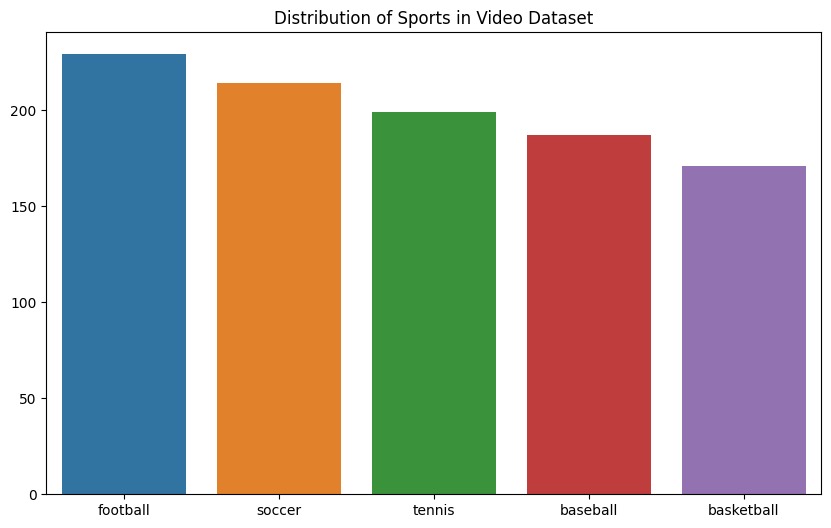

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_video is our dataset dataframe
sns.countplot(df_video['Sport_Label'])
plt.title('Distribution of Sports in Video Dataset')
plt.show()

## Data Preprocessing and Cleaning

Video data stands apart in its complexity. Unlike static datasets, videos capture a temporal sequence of frames, each potentially rich in information. This dynamic nature makes preprocessing an imperative step. Here's a deeper dive into the challenges and methods associated with video data preprocessing:

### High Dimensionality:
Every frame in a video can be viewed as an image, and every pixel in that image can be a feature. A short 10-second clip at 30 frames per second yields 300 high-resolution images. This can translate to millions of features, making dimensionality reduction techniques crucial.

### Varied Quality and Resolutions:
Videos sourced from different devices or platforms might have varied resolutions, frame rates, and quality. Standardizing the resolution ensures that each video is treated uniformly during analysis. Techniques like interpolation might be used to standardize frame rates.

### Noise and Artifacts:
Real-world videos might contain noise due to poor lighting, camera shakes, or compression artifacts. Denoising algorithms can help clean up the video, improving the quality of subsequent feature extraction.

### Temporal Alignments:
Unlike static images, videos capture actions and behaviors over time. Ensuring temporal alignments, such as consistent frame rates or syncing audio with visual data, is crucial.

### Data Augmentation:
Given the limited amount of labeled video data available for training robust models, data augmentation techniques, such as random cropping, rotation, and temporal slicing, can artificially expand the dataset.

### Feature Extraction:
Raw pixel values might not be informative for certain tasks. Extracting higher-level features, such as optical flow (capturing motion) or embeddings from pre-trained neural networks, can be more representative.

### Compression:
Storing and processing high-resolution videos require significant storage and computational power. Employing video compression techniques can make the dataset more manageable without significant loss of information.

### Annotations and Labels:
For supervised learning tasks, ensuring that video annotations (like action labels or object bounding boxes) are consistent and accurate is vital.

In essence, preprocessing video data is a multifaceted task that sets the foundation for all subsequent analysis. Properly preprocessed videos not only ease the modeling process but also significantly boost the performance of video analytics models.

In [ ]:
# code to preprocess videos
from video_processing_lib import resize_video, extract_frames, convert_to_grayscale

# Create an empty list to store processed frames for each video
all_processed_frames = []

for video_path in df_video['Video_Path']:
    # Resize the video
    resize_video(video_path, resolution=(1280, 720))

    # Extract 10 frames from the resized video
    frames = extract_frames(video_path, n_frames=10)

    # Convert frames to grayscale and flatten them into a single array
    processed_frames = [convert_to_grayscale(frame).flatten() for frame in frames]

    # Store processed frames
    all_processed_frames.append(processed_frames)

# Convert the list of processed frames into a DataFrame
df_processed = pd.DataFrame(all_processed_frames)


## Model Building and Evaluation
With our features in hand, we can now build a model. For simplicity, let's assume a classification task where we predict the sport type based on video features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# code to train a model
X = df_video['Extracted_Features']
y = df_video['Sport_Label']
clf = RandomForestClassifier()
clf.fit(X, y)

# Model evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Video Dataset - Accuracy: {accuracy:.2f}")